# 02 - Exploratory Data Analysis (Drivers & Visuals)

In [26]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import math
# directory for saving plots 
PLOT_DIR = "../plots/eda"
os.makedirs(PLOT_DIR, exist_ok=True)

filepath_train = r"../data/cleaned_data_dropped.csv"
df = pd.read_csv(filepath_train)

df.head()

,Sample_ID,Site_ID,ClimSST,Temperature_Kelvin,Temperature_Mean,Temperature_Minimum,Temperature_Maximum,Temperature_Kelvin_Standard_Deviation,Windspeed,SSTA,...,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Depth_m,Distance_to_Shore,Exposure,Turbidity,Cyclone_Frequency,Percent_Bleached,is_dup
0,10274495.0,12082.0,301.65,303.50,299.79,293.35,305.54,2.52,2.0,0.49,...,0.74,6.05,0.22,8.3,8311.0,exposed,0.0586,56.583448,4.76,False
1,10274496.0,12083.0,299.31,300.84,299.75,293.68,305.44,2.54,6.0,-0.42,...,0.93,10.39,0.27,14.9,10747.0,exposed,0.0543,52.842523,21.88,False
2,10274497.0,12084.0,300.56,302.65,299.81,293.35,305.47,2.50,5.0,0.36,...,0.83,7.18,0.23,10.7,9396.0,exposed,0.0571,56.583448,19.66,False
3,10274498.0,12085.0,299.75,302.43,299.81,293.35,305.47,2.50,7.0,0.54,...,0.83,7.18,0.23,7.6,9408.0,exposed,0.0571,56.583448,28.03,False
4,10274500.0,12086.0,299.35,302.23,299.81,293.35,305.47,2.50,4.0,0.43,...,0.83,7.18,0.23,9.7,9362.0,exposed,0.0571,56.583448,43.59,False


In [27]:
df.columns

Index(['Sample_ID', 'Site_ID', 'ClimSST', 'Temperature_Kelvin',
       'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum',
       'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA',
       'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
       'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation',
       'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
       'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA',
       'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
       'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax',
       'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation',
       'TSA_DHWMax', 'TSA_DHWMean', 'Depth_m', 'Distance_to_Shore', 'Exposure',
       'Turbidity', 'Cyclone_Frequency', 'Percent_Bleached', 'is_dup'],
      dtype='object')

our columns do comply with the documentation, so we'll use the df_column_descriptions as our main domain knowledge reference

In [28]:
print(df.loc[df["Percent_Bleached"] < 0, "Percent_Bleached"])
df.loc[df["Percent_Bleached"] < 0, "Percent_Bleached"].count()

48      -9.800000
279     -2.700000
534    -29.890000
712    -10.000000
761     -6.350000
802    -83.330000
813    -90.410000
989     -1.000000
1127   -42.900000
1200   -20.000000
1201   -31.000000
1245   -68.421053
1304   -29.600000
1467   -25.000000
1670   -39.600000
1737   -86.000000
1935    -2.802198
2054   -25.371798
2073   -20.353836
2354    -0.694444
2599    -6.352273
2764   -13.280000
2859    -4.170000
2904   -52.170000
3036    -9.200000
3135   -10.000000
3143   -58.300000
3312   -25.000000
3373   -31.292874
3437    -1.841949
Name: Percent_Bleached, dtype: float64


30

we have discovered that there are negative values in the target variable, but it does not make sense to have negative values in the 'Percent_Bleached' since the biological standpoint -> our solution is to drop them since there are only 34 rows

In [29]:
df.drop(df[df["Percent_Bleached"] < 0].index, inplace=True)

In [30]:
print(df.loc[df["Percent_Bleached"] < 0, "Percent_Bleached"])
df.loc[df["Percent_Bleached"] < 0, "Percent_Bleached"].count()

Series([], Name: Percent_Bleached, dtype: float64)


0

In [31]:
target = df['Percent_Bleached']

In [32]:
target.describe()

count    3663.000000
mean       24.093960
std        33.579863
min        -0.000000
25%         1.772857
50%         9.150000
75%        33.333333
max       199.384383
Name: Percent_Bleached, dtype: float64

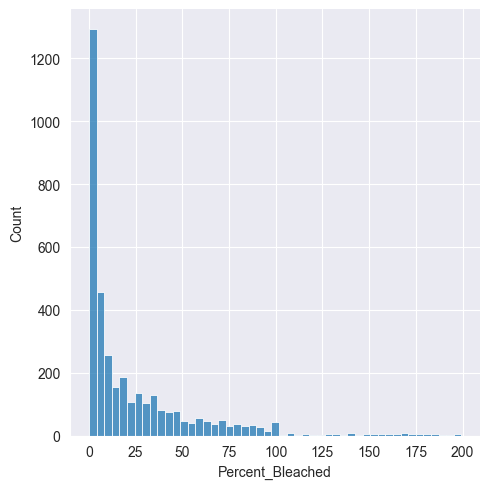

In [33]:
fig = sns.displot(target)
plt.savefig(os.path.join(PLOT_DIR, "01_target_distribution.png"), dpi=300, bbox_inches='tight')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6859: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


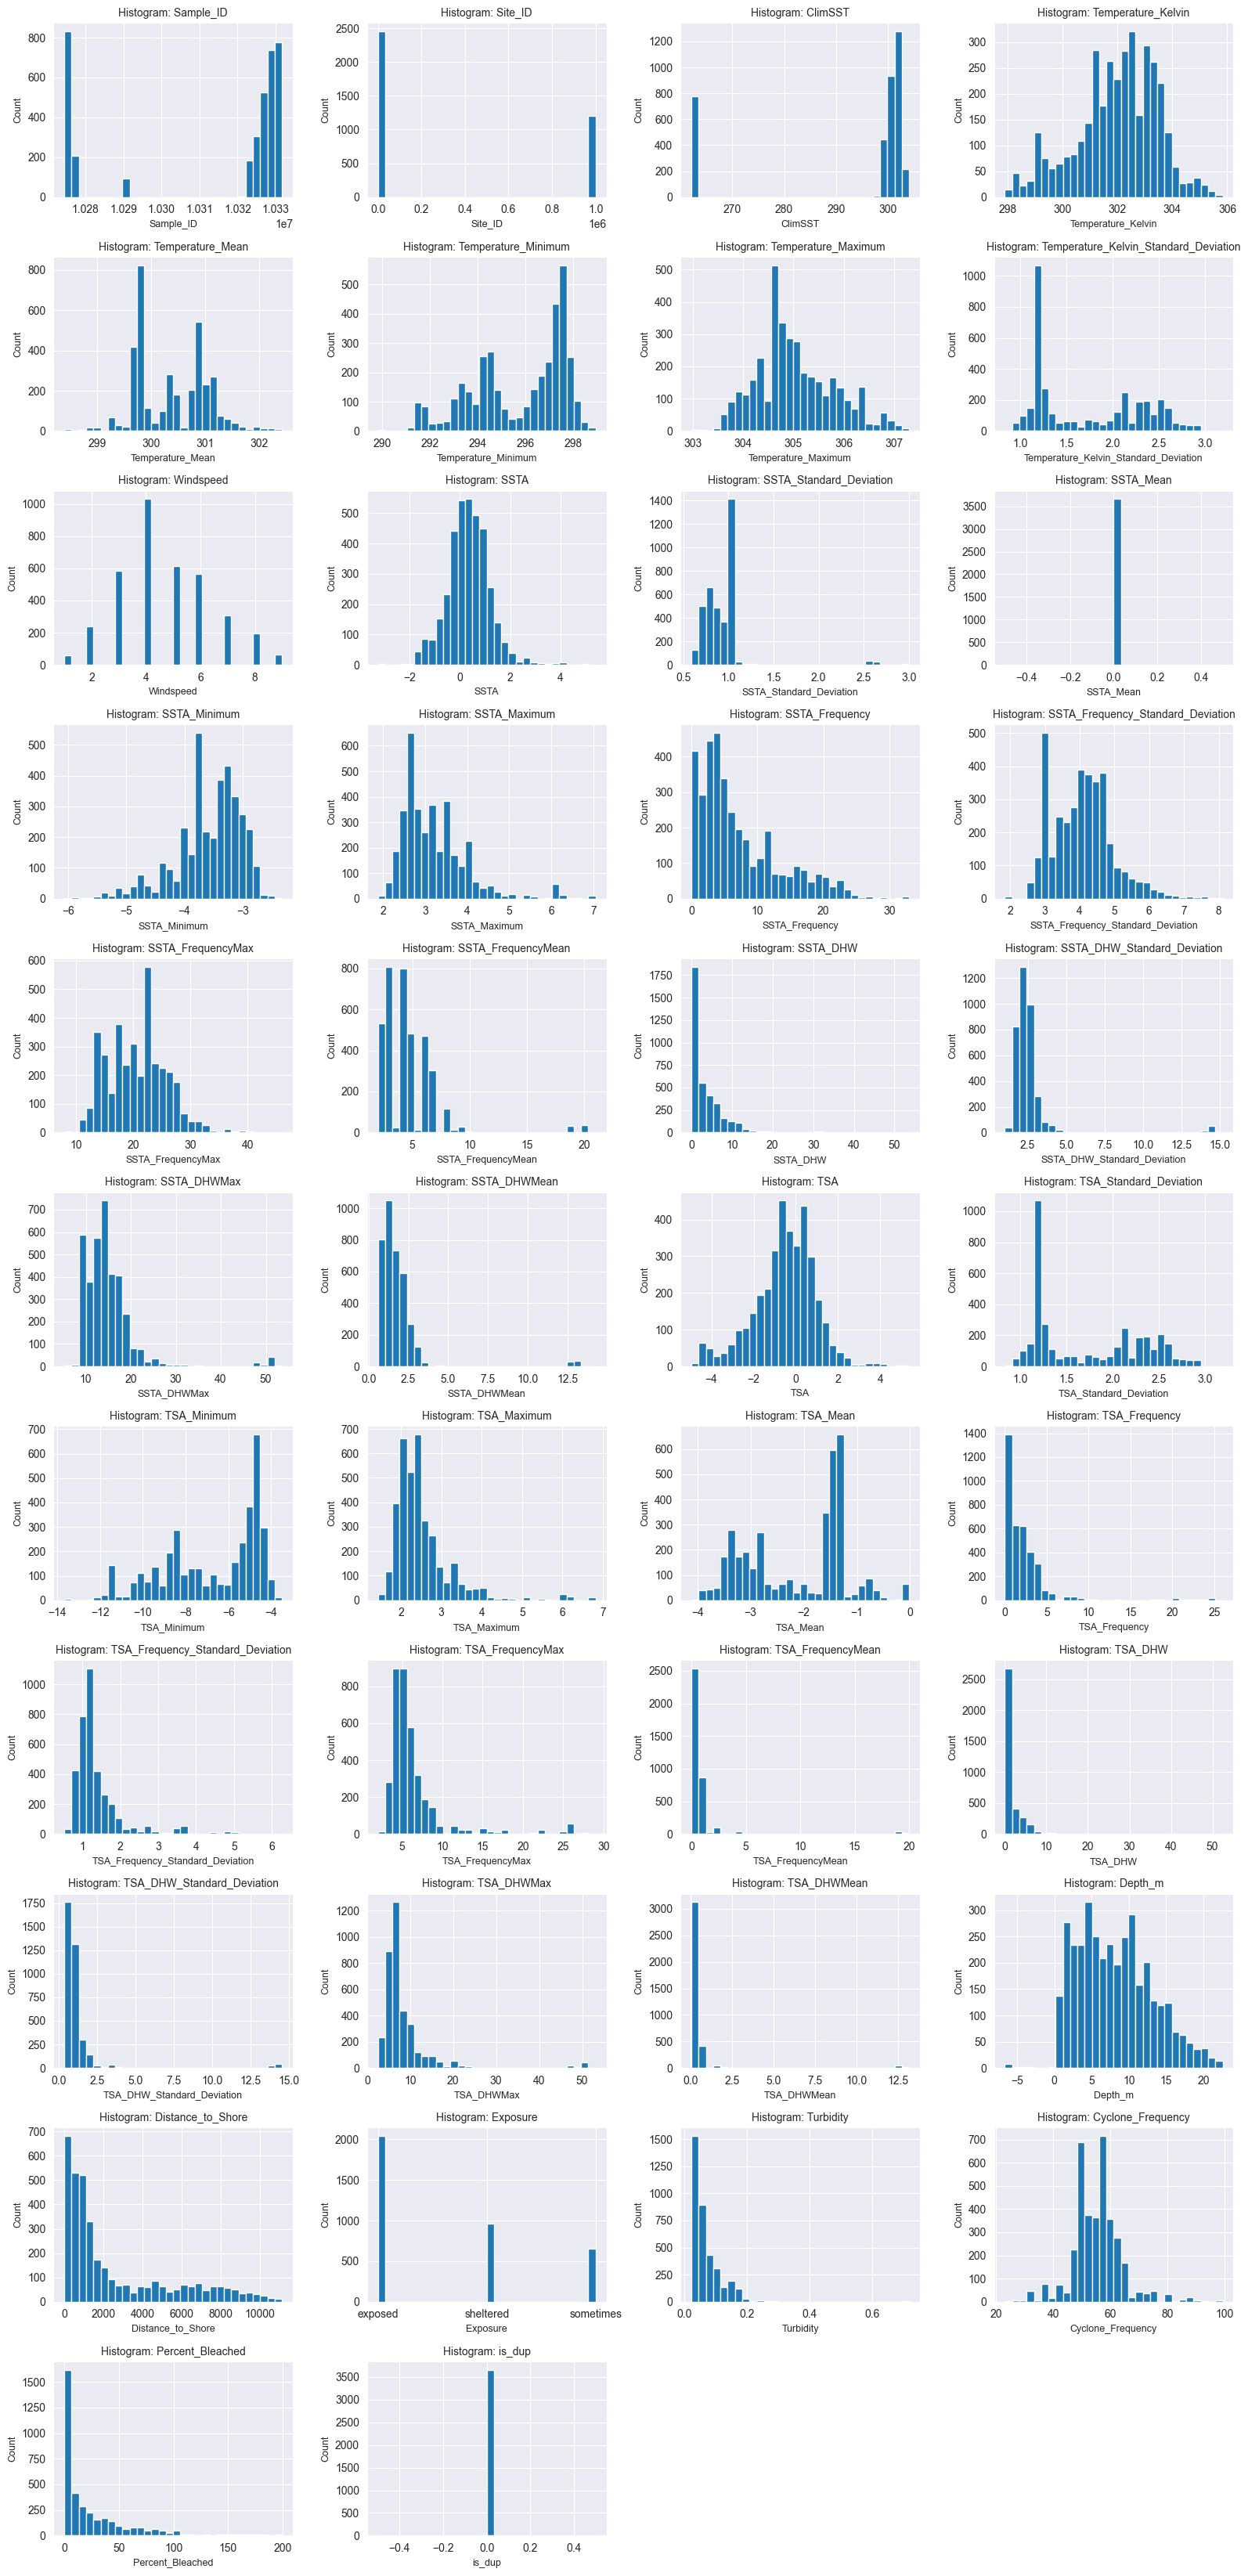

In [51]:
features = [c for c in df.columns if c != "target"]

n_cols = 4
n_rows = math.ceil(len(features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows))
axes = axes.ravel() if hasattr(axes, "ravel") else [axes]

for i, col in enumerate(features):
    ax = axes[i]
    ax.hist(df[col].dropna(), bins=30)
    ax.set_title(f"Histogram: {col}", fontsize=10)
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel("Count", fontsize=9)

for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, "per_feature_distro.png"), dpi=300, bbox_inches='tight')
plt.show()


In [35]:
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())

Skewness: 2.241846
Kurtosis: 5.910619


the data is right skewed and most of the data are clustered at the lower values, leptokurtic distribution which 
means we have either extreme outliers or quite complex relationship that we need to explore 

# Correlation among thermal indicators 

In [36]:
cols_of_interest = [
    "SSTA_Mean", "SSTA_DHWMean", "SSTA_Frequency",
    "SSTA", "TSA",
    "Temperature_Mean", "TSA_Mean",
    "SSTA_DHW", "TSA_DHW"
]

cols_existing = [c for c in cols_of_interest if c in df.columns]
corr_subset = df[cols_existing].corr()

corr_subset


,SSTA_Mean,SSTA_DHWMean,SSTA_Frequency,SSTA,TSA,Temperature_Mean,TSA_Mean,SSTA_DHW,TSA_DHW
SSTA_Mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SSTA_DHWMean,NaN,1.000000,0.374977,0.434039,0.341184,-0.256864,0.064684,0.697081,0.785087
SSTA_Frequency,NaN,0.374977,1.000000,0.277823,0.189198,-0.178999,0.043015,0.604896,0.484473
SSTA,NaN,0.434039,0.277823,1.000000,0.715047,-0.203849,-0.038858,0.498676,0.439472
TSA,NaN,0.341184,0.189198,0.715047,1.000000,-0.128764,0.031292,0.441790,0.388449
Temperature_Mean,NaN,-0.256864,-0.178999,-0.203849,-0.128764,1.000000,0.727070,-0.138375,-0.102657
TSA_Mean,NaN,0.064684,0.043015,-0.038858,0.031292,0.727070,1.000000,0.179562,0.271494
SSTA_DHW,NaN,0.697081,0.604896,0.498676,0.441790,-0.138375,0.179562,1.000000,0.902230
TSA_DHW,NaN,0.785087,0.484473,0.439472,0.388449,-0.102657,0.271494,0.902230,1.000000


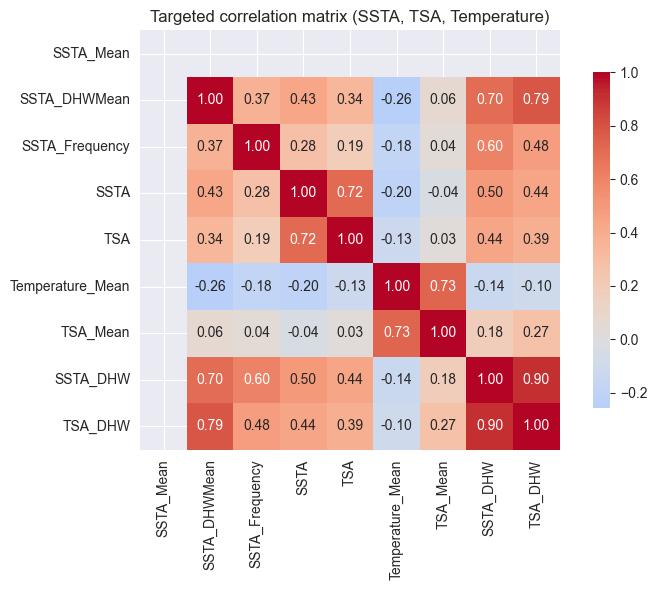

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_subset,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Targeted correlation matrix (SSTA, TSA, Temperature)")
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, "02_thermal_correlation_heatmap.png"), dpi=300, bbox_inches='tight')
plt.show()

In [38]:
from pandas.api.types import is_numeric_dtype

constant_cols = [c for c in df.columns 
                 if is_numeric_dtype(df[c]) and df[c].nunique() <= 1]

print("Constant columns (drop for correlation):", constant_cols)

df_numeric = df.drop(columns=constant_cols)

pairs_filtered = [
    ("SSTA_DHW", "SSTA_Frequency"),
    ("SSTA_DHW", "TSA_DHW"),
    ("SSTA", "TSA"),
    ("Temperature_Mean", "TSA_Mean")
]

for a, b in pairs_filtered:
    if a in df_numeric.columns and b in df_numeric.columns:
        r = df_numeric[a].corr(df_numeric[b])
        print(f"{a} ↔ {b}: {r:.3f}")


Constant columns (drop for correlation): ['SSTA_Mean', 'is_dup']
SSTA_DHW ↔ SSTA_Frequency: 0.605
SSTA_DHW ↔ TSA_DHW: 0.902
SSTA ↔ TSA: 0.715
Temperature_Mean ↔ TSA_Mean: 0.727


there is a correlaton SSTA_DHW ↔ TSA_DHW: 0.899 -> in the feature selection we should probably just use one of them to reduce high dimensionality

In [39]:
# Check count of non-NaN values
print(df[["SSTA_Mean", "SSTA_DHWMean"]].count())

# Check number of unique values
print(df[["SSTA_Mean", "SSTA_DHWMean"]].nunique())

# Check first few values
print(df[["SSTA_Mean", "SSTA_DHWMean"]].head(10))


SSTA_Mean       3663
SSTA_DHWMean    3663
dtype: int64
SSTA_Mean         1
SSTA_DHWMean    311
dtype: int64
   SSTA_Mean  SSTA_DHWMean
0        0.0          2.10
1        0.0          2.12
2        0.0          2.03
3        0.0          2.03
4        0.0          2.03
5        0.0          2.38
6        0.0          2.38
7        0.0          2.51
8        0.0          2.58
9        0.0          2.37


# Physical & Environmental indicators

In [40]:
numeric_pairs = [
    ("Depth_m", "Percent_Bleached"),
    ("Turbidity", "Percent_Bleached"),
    ("Windspeed", "SSTA_Frequency"),
    ("Windspeed", "TSA_Frequency"),
    ("Distance_to_Shore", "Turbidity")
]

for a, b in numeric_pairs:
    if a in df.columns and b in df.columns:
        valid = df[[a, b]].dropna()
        r = valid[a].corr(valid[b])
        print(f"{a} ↔ {b}: {r:.3f}")

Depth_m ↔ Percent_Bleached: 0.128
Turbidity ↔ Percent_Bleached: -0.070
Windspeed ↔ SSTA_Frequency: 0.024
Windspeed ↔ TSA_Frequency: 0.088
Distance_to_Shore ↔ Turbidity: 0.281


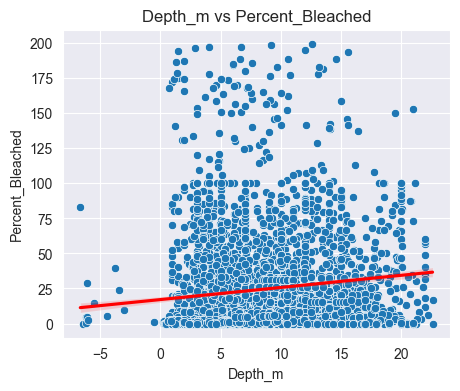

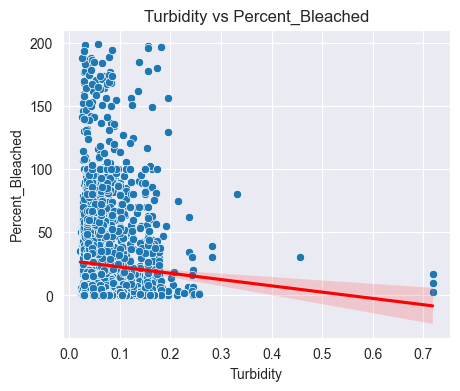

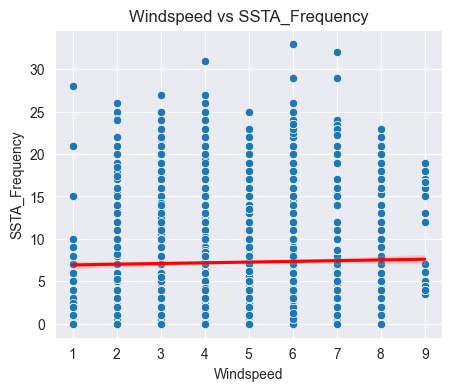

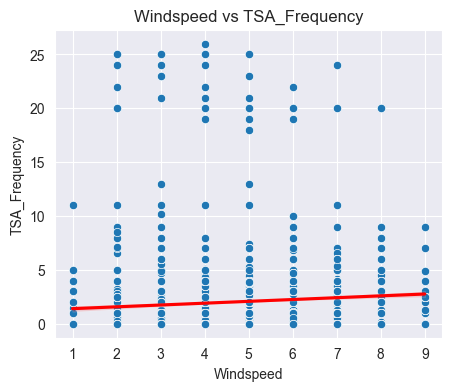

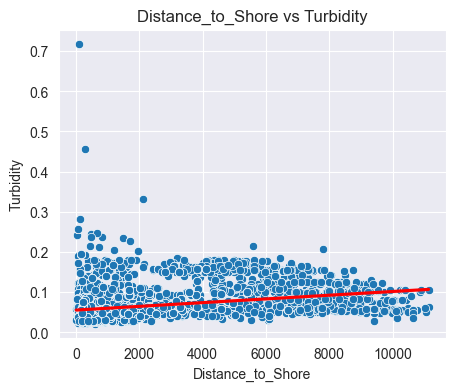

In [41]:
plot_count = 0
for a, b in numeric_pairs:
    if a in df.columns and b in df.columns:
        plot_count += 1
        plt.figure(figsize=(5,4))
        sns.scatterplot(data=df, x=a, y=b)
        sns.regplot(data=df, x=a, y=b, scatter=False, color="red")  # trend line
        plt.title(f"{a} vs {b}")
        plt.savefig(os.path.join(PLOT_DIR, f"03_scatter_{plot_count}_{a}_vs_{b}.png"), dpi=300, bbox_inches='tight')
        plt.show()

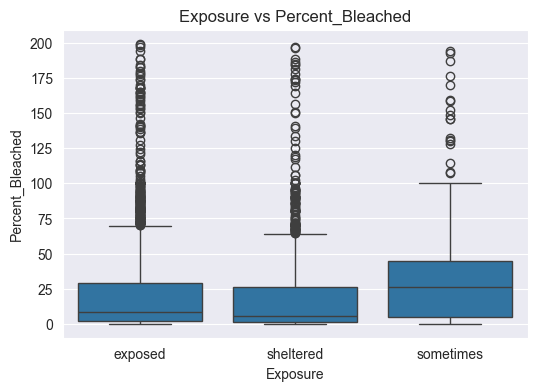

                   sum_sq      df          F        PR(>F)
C(Exposure)  5.076492e+04     2.0  22.777751  1.475047e-10
Residual     4.078533e+06  3660.0        NaN           NaN


In [42]:
# Exposure vs Percent_Bleached
if "Exposure" in df.columns and "Percent_Bleached" in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Exposure", y="Percent_Bleached", data=df)
    plt.title("Exposure vs Percent_Bleached")
    plt.savefig(os.path.join(PLOT_DIR, "04_exposure_vs_bleaching_boxplot.png"), dpi=300, bbox_inches='tight')
    plt.show()

    # Optional: ANOVA to check statistical differences
    import statsmodels.api as sm
    from statsmodels.formula.api import ols

    model = ols('Percent_Bleached ~ C(Exposure)', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)

# Site-Level and Structural Correlations

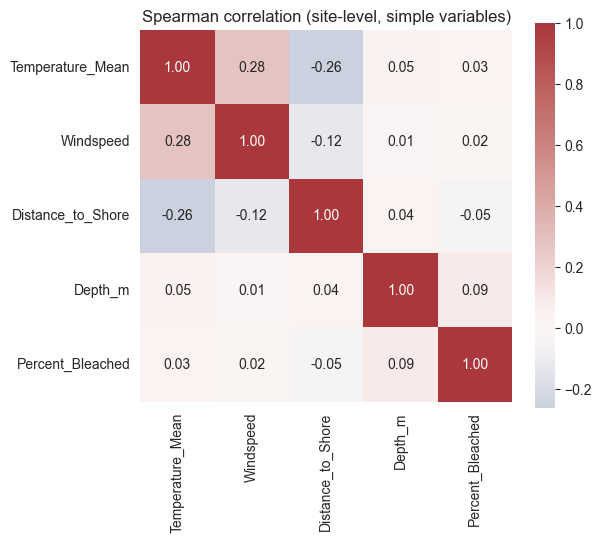

In [43]:
simple_cols = [
    "Temperature_Mean",  # average temperature
    "Windspeed",         # exposure
    "Distance_to_Shore", # offshore vs nearshore
    "Depth_m",           # shallow vs deep
    "Percent_Bleached"   # target
]
site_means_simple = df.groupby("Site_ID")[simple_cols].mean()

corr_simple = site_means_simple.corr(method="spearman")

plt.figure(figsize=(6,5))
sns.heatmap(
    corr_simple,
    annot=True,
    fmt=".2f",
    cmap="vlag",
    center=0,
    square=True
)
plt.title("Spearman correlation (site-level, simple variables)")
plt.savefig(os.path.join(PLOT_DIR, "05_site_level_spearman_correlation.png"), dpi=300, bbox_inches='tight')
plt.show()

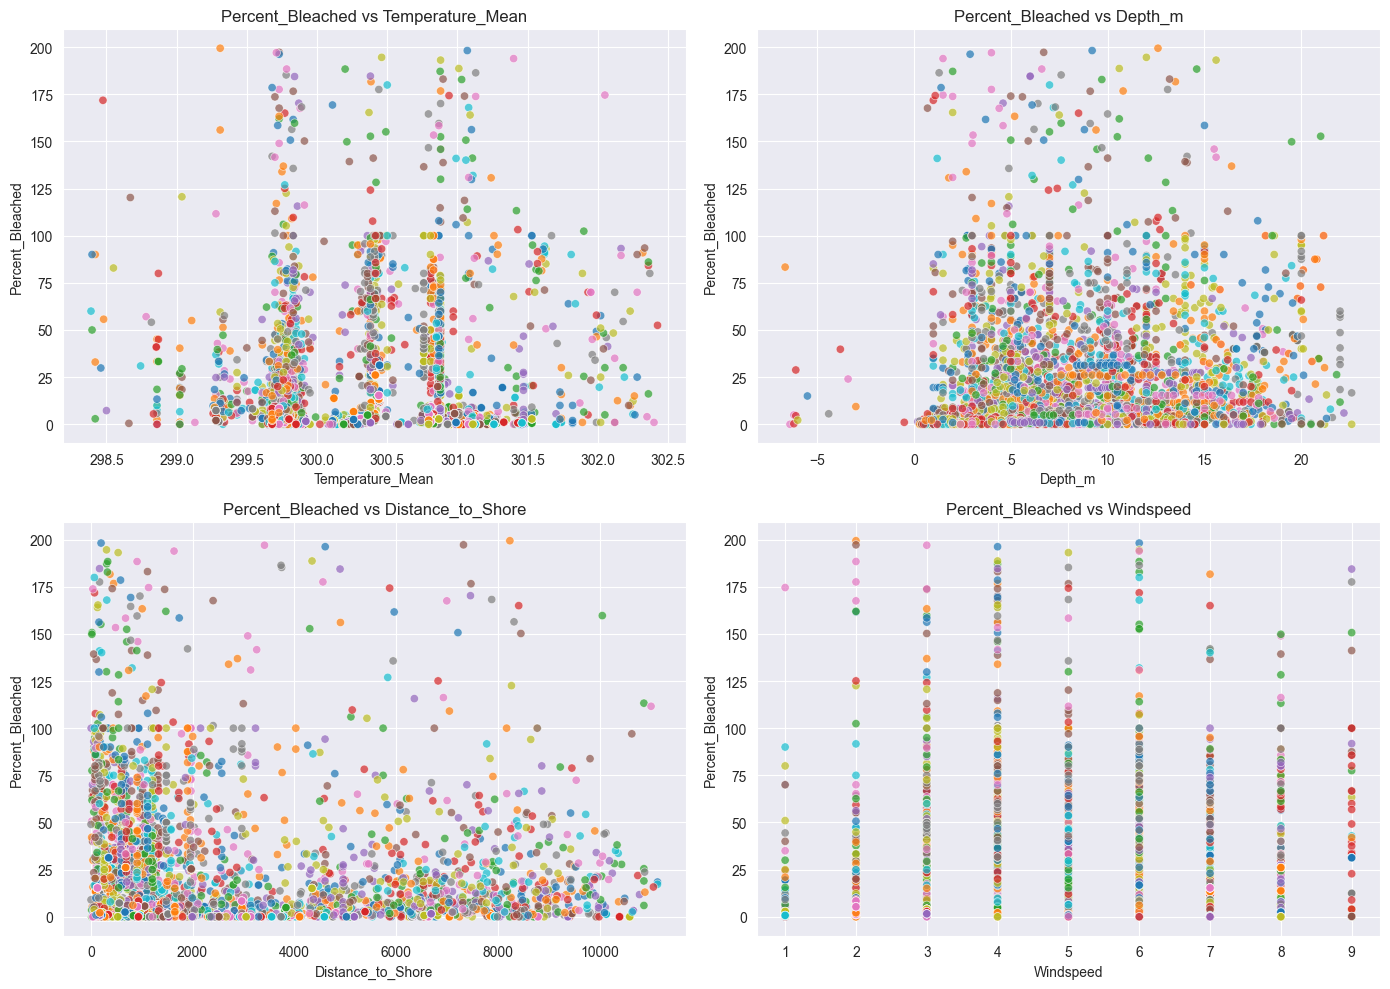

In [44]:
cols = ["Temperature_Mean", "Depth_m", "Distance_to_Shore", "Windspeed"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid
axes = axes.flatten()  

for ax, col in zip(axes, cols):
    sns.scatterplot(
        data=df, 
        x=col, 
        y="Percent_Bleached", 
        hue="Site_ID", 
        palette="tab10", 
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"Percent_Bleached vs {col}")
    ax.legend([], [], frameon=False)  

plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, "06_multiplot_bleaching_vs_features.png"), dpi=300, bbox_inches='tight')
plt.show()

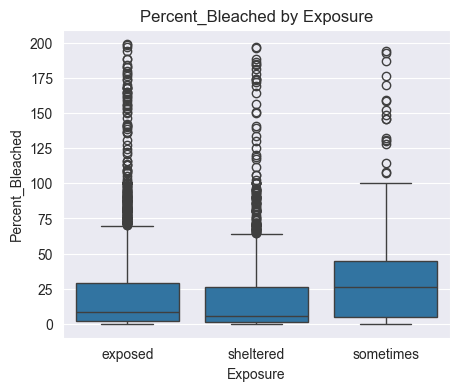

In [58]:
# Exposure
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x="Exposure", y="Percent_Bleached")
plt.title("Percent_Bleached by Exposure")
plt.savefig(os.path.join(PLOT_DIR, "07_bleaching_by_exposure.png"), dpi=300, bbox_inches='tight')
plt.show()

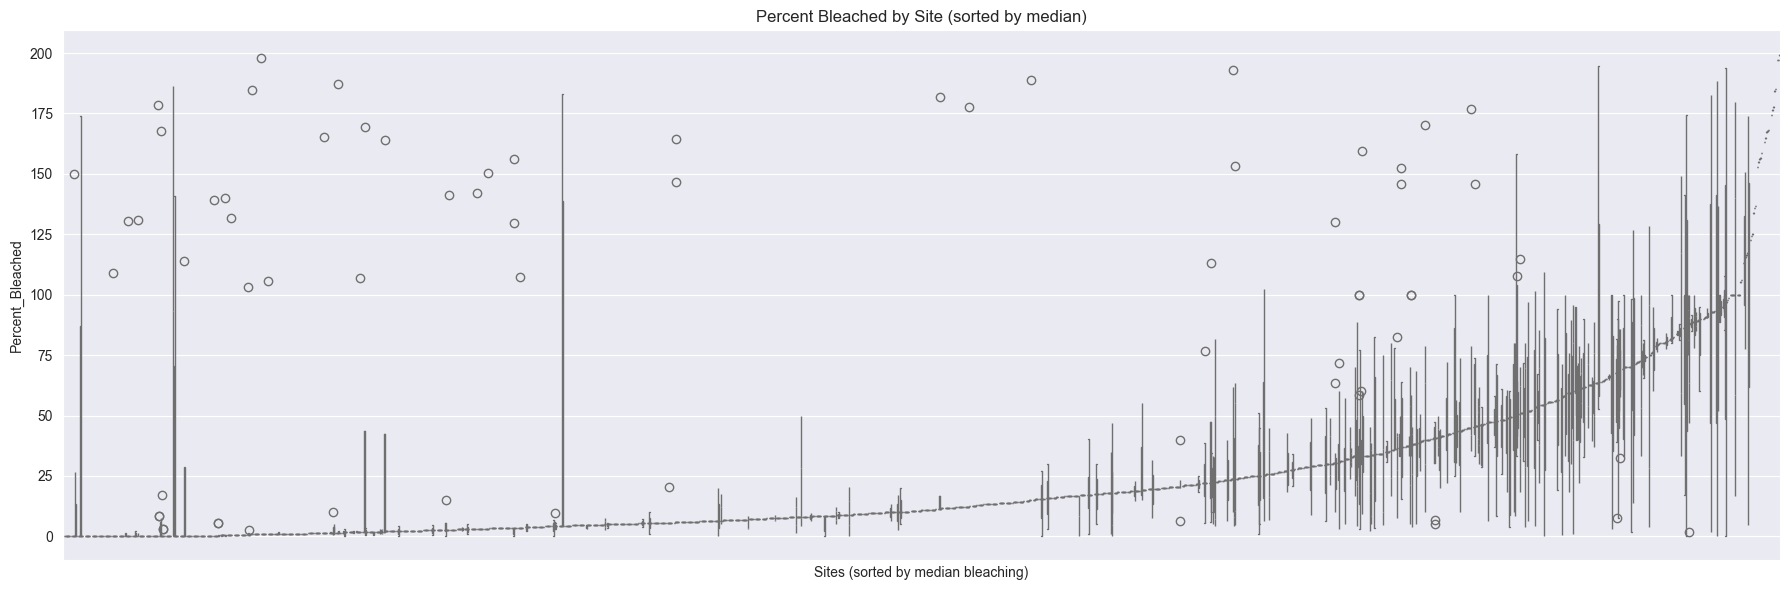

In [73]:
order = df.groupby("Site_ID")["Percent_Bleached"].median().sort_values().index

plt.figure(figsize=(18,6))
sns.boxplot(data=df, x="Site_ID", y="Percent_Bleached", order=order, color="skyblue")
plt.xticks([], [])  # hides ticks and labels
plt.xlabel("Sites (sorted by median bleaching)")
plt.title("Percent Bleached by Site (sorted by median)")
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, "percent_bleached_by_site.png"), dpi=300, bbox_inches='tight')
plt.show()

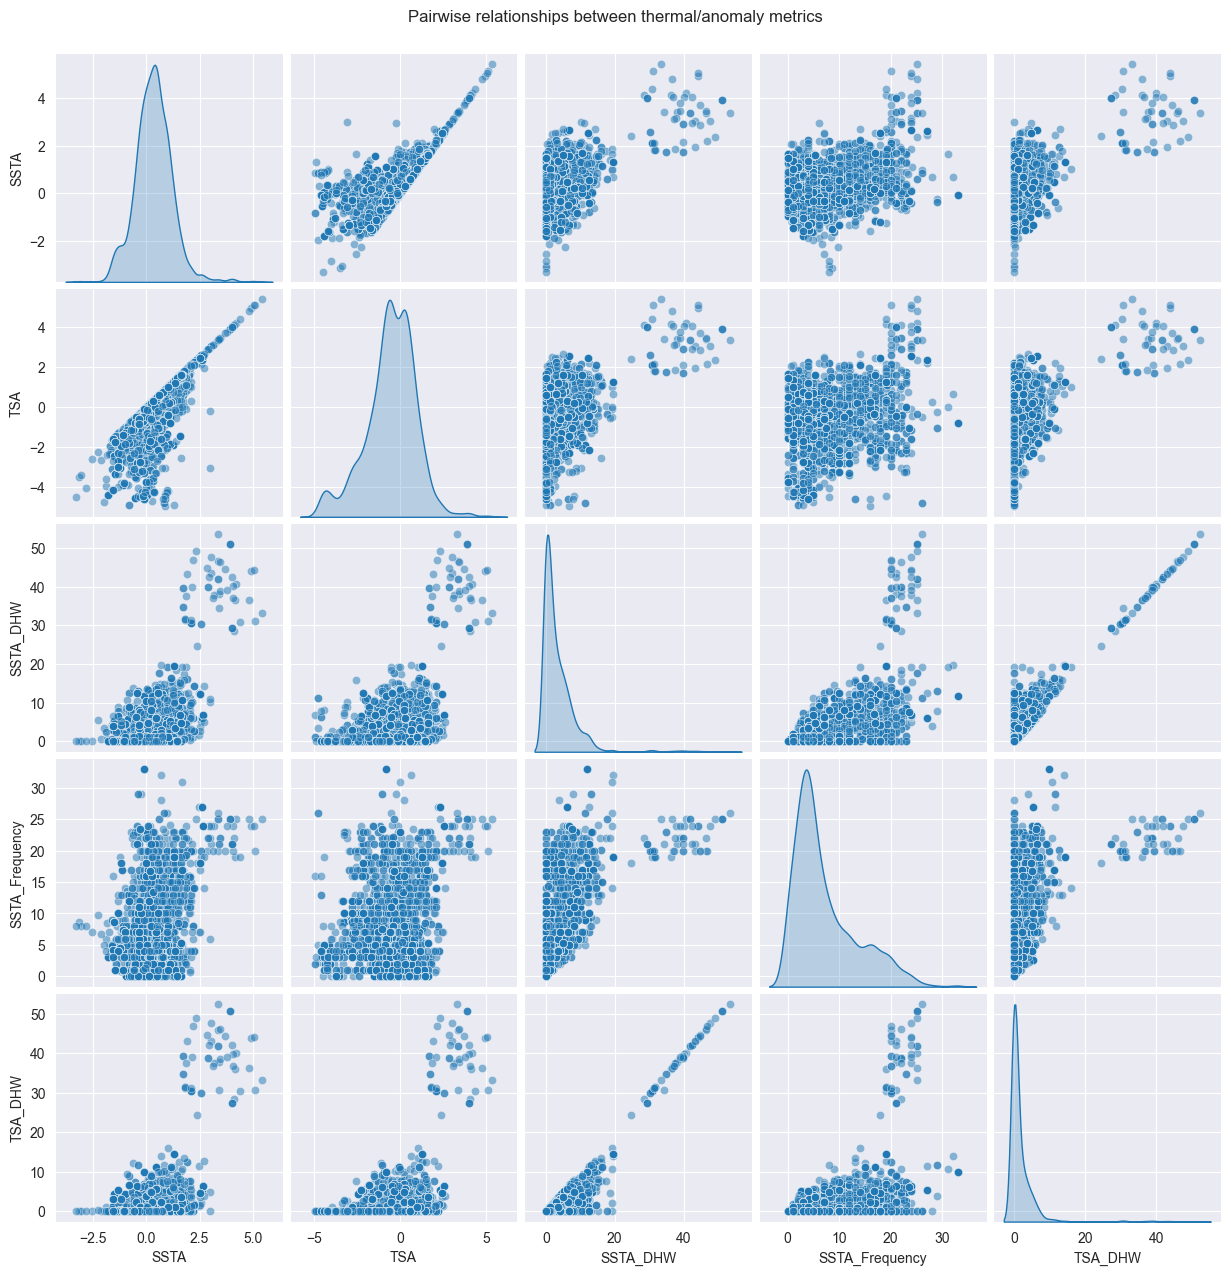

In [46]:
# Select only numeric anomaly/temperature metrics
pairplot_cols = ["SSTA", "TSA", "SSTA_DHW", "SSTA_Frequency", "TSA_DHW"]
g = sns.pairplot(df[pairplot_cols], kind="scatter", diag_kind="kde", plot_kws={"alpha":0.5})
g.fig.suptitle("Pairwise relationships between thermal/anomaly metrics", y=1.02)
plt.savefig(os.path.join(PLOT_DIR, "09_pairplot_thermal_anomalies.png"), dpi=300, bbox_inches='tight')
plt.show()

In [47]:
numeric_cols = [
    'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation',
    'SSTA', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Standard_Deviation',
    'TSA', 'TSA_Mean', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Standard_Deviation',
    'Depth_m', 'Distance_to_Shore', 'Windspeed'
]

X = df[numeric_cols].copy()
y = df['Percent_Bleached']  # target for mutual information

# Standardize for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/var/folders/m7/5g6r4bs10r13n18xl624y6fm0000gn/T/ipykernel_9353/873517899.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.index, y=mi_series.values, palette="viridis")


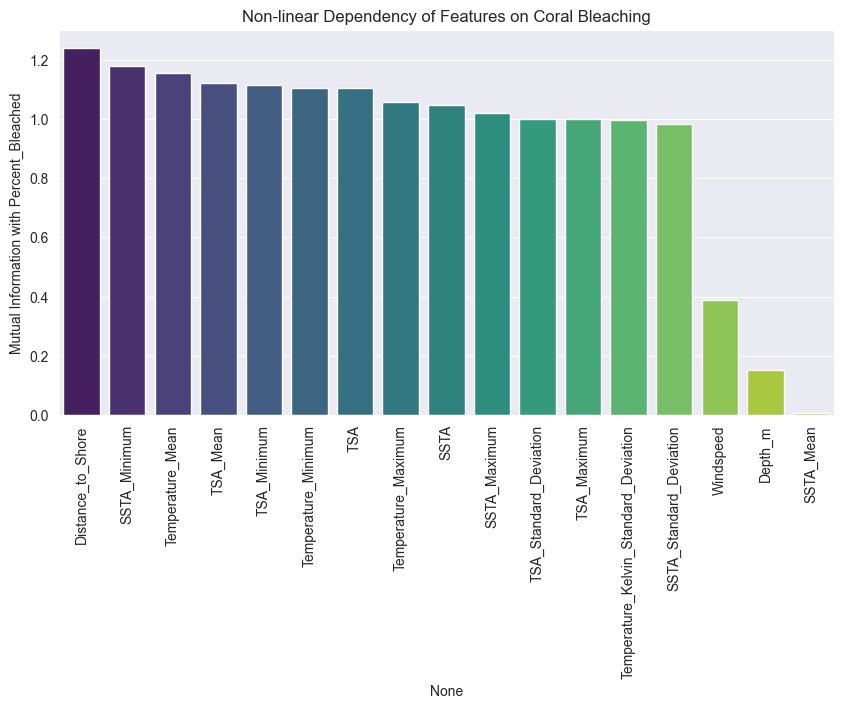

In [48]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns

# Compute MI
mi = mutual_info_regression(X, y, random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=mi_series.index, y=mi_series.values, palette="viridis")
plt.xticks(rotation=90)
plt.ylabel("Mutual Information with Percent_Bleached")
plt.title("Non-linear Dependency of Features on Coral Bleaching")
plt.savefig(os.path.join(PLOT_DIR, "10_mutual_information_features.png"), dpi=300, bbox_inches='tight')
plt.show()

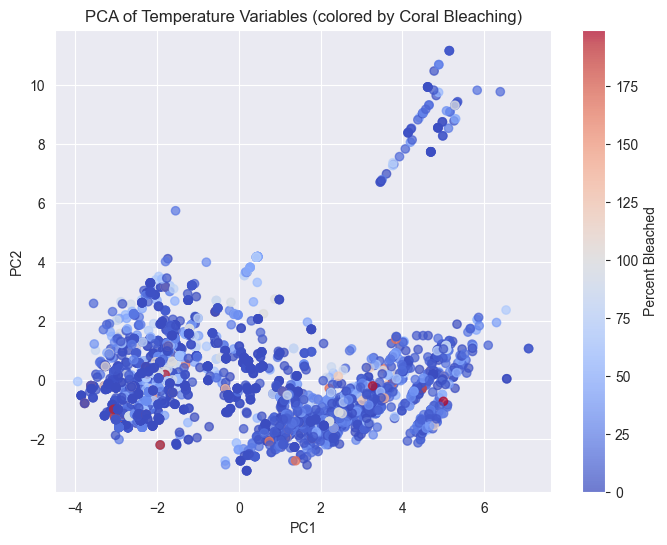

Explained variance ratio: [0.47420351 0.23057758]


In [49]:
from sklearn.decomposition import PCA
import numpy as np

# Select only temperature-related variables
temp_cols = [
    'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation',
    'SSTA', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Standard_Deviation',
    'TSA', 'TSA_Mean', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Standard_Deviation'
]

X_temp = X_scaled[:, [X.columns.get_loc(c) for c in temp_cols]]

# Run PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_temp)

# Visualize
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Percent Bleached')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Temperature Variables (colored by Coral Bleaching)")
plt.savefig(os.path.join(PLOT_DIR, "11_pca_temperature_variables.png"), dpi=300, bbox_inches='tight')
plt.show()

# Optional: Check explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Save the dataset & Plots

Since we removed some values during EDA (because we found information that did not make sense), we need to:
1. Save the cleaned dataframe to another CSV file for modeling
2. All plots generated in this notebook are automatically saved to `../plots/eda/` folder with high resolution (300 DPI)

In [50]:
df.to_csv("../data/cleaned_data_after_eda.csv")